# CSC421 - Spring 2022 Project
### Student: Ahmed Ahmed - V00947456

# Mini-Project 1 
## Traveling salesman problem using Minimum-Spanning Tree heuristic 
This project is based on material from Chapter 3 Solving Problems by Searching. You will need to review that material on your own. 

The traveling salesperson problem (TSP) can be formulated as a search problem and A* search can be used  with the minimum-spanning-tree (MST) heuristic. This heuristic estimates the cost of completing a tour, given that a partial tour has already been constructed. The MST cost of a set of cities is the smallest sum of the link costs of any tree that connects all the cities.

1. Write a problem generator and visualizer 
for instances of the TSP problem where cities are represented by random points in the unit square (6-10 cities are recommended) **(Basic - 2 points)**

In [160]:
!pip install matplotlib
!pip install numpy
!pip install networkx
!pip install igraph
!pip install python-igraph leidenalg cairocffi
!pip install pycairo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import networkx.algorithms.approximation as nx_app
import random
import math
import igraph as ig

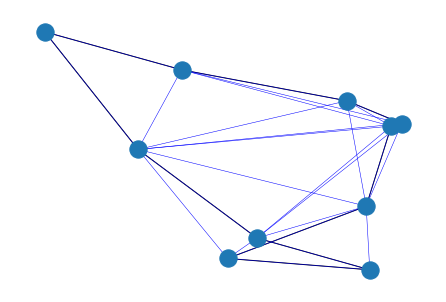

In [12]:
city_list = []
neighbors = {k: [] for k in range(8)}
xr = random.randint(1,15)   
yr = random.randint(1,15)
for n in range(8):
    while((xr,yr) in city_list):
        xr = random.randint(1,15)   
        yr = random.randint(1,15)
    city_list.append((xr,yr))

def weight(p1, p2):
    return math.sqrt((p2[0]-p1[0])**2 + (p2[1] - p1[1])**2)

graph = np.zeros(shape=(8,8))
for n in range(len(city_list)):
    for n2 in range(len(city_list)):
        graph[n, n2] = weight(city_list[n], city_list[n2])

G = nx.random_geometric_graph(10, radius=0.5)
pos = nx.get_node_attributes(G, "pos")

H = G.copy()

for i in range(len(pos)):
    for j in range(i + 1, len(pos)):
        dist = math.hypot(pos[i][0] - pos[j][0], pos[i][1] - pos[j][1])
        dist = dist
        G.add_edge(i, j, weight=dist)

cycle = nx_app.christofides(G, weight="weight")
edge_list = list(nx.utils.pairwise(cycle))


nx.draw(G, pos, edgelist=edge_list)
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)


plt.show()

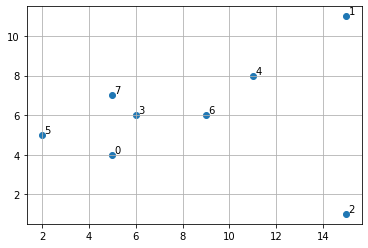

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
[(5, 4), (15, 11), (15, 1), (6, 6), (11, 8), (2, 5), (9, 6), (5, 7)]


In [19]:
def plot_path(cities, order, title, style):
    path = []
    for n in order:
        path.append(cities[n])
        
    np_path = np.array(path)
    x, y = np_path.T
    plt.scatter(x, y)
    
    for i, txt in enumerate(path):
        plt.annotate(i, (x[i]+0.1, y[i]+0.1))
    plt.plot(x,y,linestyle=style)
    plt.title(title)
    plt.grid()
    plt.show()
    
cities = np.array(city_list)  
x, y = cities.T
plt.scatter(x,y)
for i, txt in enumerate(cities):
    plt.annotate(i, (x[i]+0.1, y[i]+0.1))

plt.grid()
plt.show()
print(neighbors)
print(city_list)

2. Solve the path problem of visiting all cities using the two main uninformed search strategies (BFS and DFS) and display your solution as a path between the cities **(Basic - 2 points)**

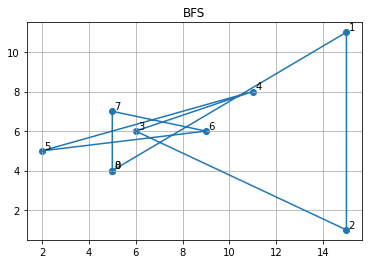

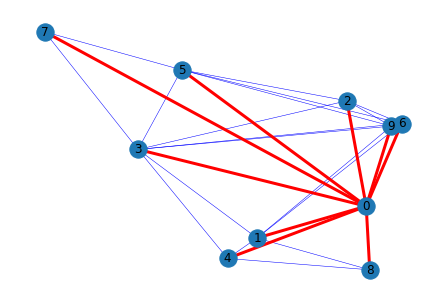

In [23]:
def bfs(graph, city):
    queue = []
    visit = []
    visit.append(city)
    queue.append(city)
    while queue:
        c = queue.pop(0)
        for n in range(len(graph[c])):
            if n not in visit:
                visit.append(n)
                queue.append(n)
    visit.append(city)
    return visit

bfs_order = bfs(graph, 0)
plot_path(city_list, bfs_order, "BFS", 'solid')
bfs_edges = list(nx.bfs_edges(G, source=0))

nx.draw(G, pos, edgelist=bfs_edges)
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)

nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=bfs_edges,
    edge_color="red",
    node_size=200,
    width=3,
)
                

In [25]:
def dfs(graph, city):
    visited = set() # Set to keep track of visited nodes.
    order = []
    dfs_helper(order, visited, graph, city)
    order.append(city)
    return order

def dfs_helper(order, visited, graph, city):
    if city not in visited:
        order.append(city)
        visited.add(city)
        for neighbour in range(len(graph[city])):
            dfs_helper(order, visited, graph, neighbour)
    
    

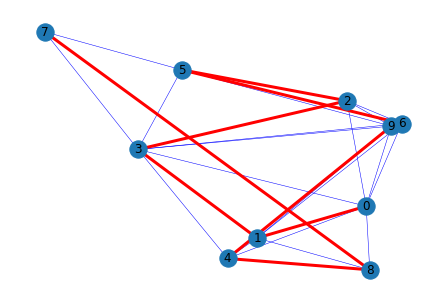

In [27]:
dfs_order = dfs(graph, 0)
dfs_edges = list(nx.dfs_edges(G, source=0))

nx.draw(G, pos, edgelist=dfs_edges)
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)

nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=dfs_edges,
    edge_color="red",
    node_size=200,
    width=3,
)
      

3. Show and describe how the MST heuristic can be derived from a relaxed version of the TSP (Expected - 2 points)

In a relaxed version of the Traveling Salesman Problem it would be allowed to visit the citeis more than once, an MST heuristic can be derived as long as any duplicate edges are not counted towards the weight. 

4. Compare the average time (total number of nodes generated) and space (largest size of frontier) complexity for BFS and DFS when running your search algorithm. **(Expected - 2 points)**

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 6), (0, 8), (0, 9), (0, 5), (0, 7)]
[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 9), (9, 4), (4, 8), (8, 7)]
BFS Tree


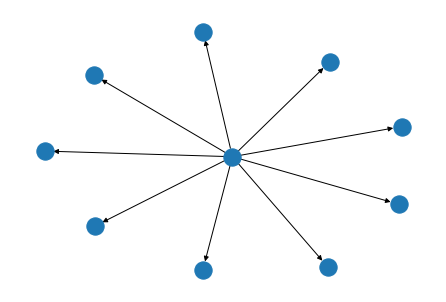

In [35]:
print(bfs_edges)
print(dfs_edges)
dfs_tree = nx.dfs_tree(G, source=0)
bfs_tree = nx.bfs_tree(G, source=0)
print("BFS Tree")
nx.draw(bfs_tree)

DFS Tree


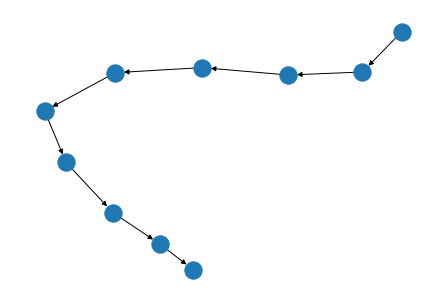

In [36]:
print("DFS Tree")
nx.draw(dfs_tree)

4. Find an efficient algorithm in the literature for constructing the MST, and use it with A* graph search to solve instances of the TSP. **(Advanced - 2 points)**

# Mini-Project 5 
## Logic Circuits domain using FOL 

This project is based on material from Chapter 8 First-Order Logic that we have covered. It is based on 
the example of using FOL to model circuits and circuit verification described in section 8.4.2 (page 273).  


1. Encode the general knowledge about the domain (signals and connections) as described in the book using the FOL knowledge base implementation provided by the AIMA textbook **(Basic - 2 points)** 

In [5]:
!pip install logic
!pip install ipythonblocks
!pip install sortedcontainers

  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)


In [552]:
from utils import *
from logic import *

In [561]:
clauses = []
clauses.append(expr("Signal(x) & Signal(y) & Equal(Signal(x), HIGH) & Equal(Signal(y), HIGH) ==> Equal(Signal(x), Signal(y))"))
clauses.append(expr("Signal(x) & Signal(y) & Equal(Signal(x), LOW) & Equal(Signal(y), LOW) ==> Equal(Signal(x), Signal(y))"))
clauses.append(expr("Terminal(x) & Terminal(y) & Connected(x,y) ==> Equal(x,y)"))
clauses.append(expr("Terminal(x) ==> Equal(Signal(x), HIGH)"))
clauses.append(expr("Terminal(x) ==> Equal(Signal(x), LOW)"))
clauses.append(expr("Connected(x,y) ==> Connected(y,x)"))
clauses.append(expr("Connected(y,x) ==> Connected(x,y)"))

2. Encode the gate definitions using the same FOL implementation - note that you will need to introduce some additional predicates and eliminate bi-directional implications in order to have first-order definite clauses **(Basic - 2 points)**

In [562]:
clauses.append(expr("Signal(x) & Signal(y) & Equal(Signal(x), HIGH) & Equal(Signal(y), LOW) ==> NotEqual(Signal(x), Signal(y))"))
clauses.append(expr("Signal(x) & Signal(y) & Equal(Signal(x), LOW) & Equal(Signal(y), HIGH) ==> NotEqual(Signal(x), Signal(y))"))
clauses.append(expr("Gate(g) & Type(g, AND) & Equal(Signal(In(n,g)), LOW) ==> Equal(Signal(Out(1,g)), LOW)"))
clauses.append(expr("Equal(Signal(Out(1,g)), LOW) ==> Equal(Signal(In(n,g)), LOW)"))
clauses.append(expr("Gate(g) & Type(g, OR) & Equal(Signal(In(n,g)), HIGH) ==> Equal(Signal(Out(1,g)), HIGH)"))
clauses.append(expr("Equal(Signal(Out(1,g)), HIGH) ==> Equal(Signal(In(n,g)), HIGH)"))
clauses.append(expr("Gate(g) & Type(g, XOR) & NotEqual(Signal(In(1,g)), Signal(In(2,g))) ==> Equal(Signal(Out(1,g)), HIGH)"))
clauses.append(expr("Equal(Signal(Out(1,g)), HIGH) ==> NotEqual(Signal(In(1,g)), Signal(In(2,g)))"))
clauses.append(expr("Gate(g) & Type(g, NOT) ==> NotEqual(Signal(In(1,g)), Signal(Out(1,g)))"))
clauses.append(expr("Gate(g) & Type(g, NOT) ==> Arity(g,1,1)"))
clauses.append(expr("Gate(g) & Type(g, AND) ==> Arity(g,2,1)"))
clauses.append(expr("Gate(g) & Type(g, OR) ==> Arity(g,2,1)"))
clauses.append(expr("Gate(g) & Type(g, XOR) ==> Arity(g,2,1)"))

3. Encode the specific problem instance shown in the book using your implementation **(Expected - 2 points)**

In [563]:
clauses.append(expr("Circuit(C1)"))
clauses.append(expr("Arity(C1,3,2)"))
clauses.append(expr("Gate(X1)"))
clauses.append(expr("Type(X1, XOR)"))
clauses.append(expr("Gate(X2)"))
clauses.append(expr("Type(X2, XOR)"))
clauses.append(expr("Gate(A1)"))
clauses.append(expr("Type(A1, AND)"))
clauses.append(expr("Gate(A2)"))
clauses.append(expr("Type(A2, AND)"))
clauses.append(expr("Gate(O1)"))
clauses.append(expr("Type(A2, OR)"))
clauses.append(expr("Connected(Out(1,X1), In(1,X2))"))
clauses.append(expr("Connected(Out(1,X1), In(2,A2))"))
clauses.append(expr("Connected(Out(1,A2), In(1,O1))"))
clauses.append(expr("Connected(Out(1,A1), In(2,O1))"))
clauses.append(expr("Connected(Out(1,X2), Out(1,C1))"))
clauses.append(expr("Connected(Out(1,O1), Out(2,C1))"))
clauses.append(expr("Connected(In(1,C1), In(1,X1))"))
clauses.append(expr("Connected(In(2,C1), In(1,A1))"))
clauses.append(expr("Connected(In(2,C1), In(2,X1))"))
clauses.append(expr("Connected(In(2,C1), In(2,A1))"))
clauses.append(expr("Connected(In(3,C1), In(2,X2))"))
clauses.append(expr("Connected(In(3,C1), In(2,A2))"))

circuit_domain = FolKB(clauses)

4. Answer the query described in the book using your implementation **(Expected - 2 points)**  

In [565]:
print(circuit_domain.ask(expr("Equal(Signal(In(1,C1)), x) & Equal(Signal(In(2,C1)), y) & Equal(Signal(In(3,C1)), z) & Equal(Signal(Out(1,C1)), LOW) & Equal(Signal(Out(2,C1)), HIGH)")))


False


5. Write code to convert the logic description of the circuit to a diagram using the LaTeX markup language. You can check Overleaf for a web interface for LaTeX. Below is an example of drawing a circuit.  You can create a blank project on Overleaf, then copy and paste the code, and recompile to see the resulting circuit. Your code should takes as input a FOL KB describing the circuit and output the corresponding code to draw the circuit.**(Advanced - 2 points)** 

# Mini-Project 7 
## HMM robot 


This project is based on material from Chapter 15 Probabilistic Reasoning over time that we have covered.
The idea is to use filtering to track a roboc in an environment with no landmarks. The environment is represented as a n by m rectangular grid. The robot's location is hidden; the only evidence available to the observer is a noisy location sensor that gives an approximation to the robot's location. If the robot is at location (x,y) then: 

1. With probability 0.1 the sensor gives the correct location
2. With probability 0.05 it reports one of the 8 locations immediately surrounding (x,y) 
3. With probability 0.025 it reports one of the 16 locations surrounding those 8
4. With the remaining probability of 0.1 it report 'no reading' 

The robot's movement policy is to pick a direction and follow it with probability 0.7 on each step; the robot switches to a randomly selected new heading with probability .3 (or with probability 1 if it encounters a wall). 


1. Implement the movement poliy of the robot and show how it works by drawing a path in a rectangular grid for different stochastic simulations of the movement **(basic - 2 points)** 

In [211]:
!pip install gym
!pip install hmmlearn

In [212]:
import gym
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from hmmlearn import hmm
from gym import Env

In [316]:
class RobotEnv(Env):
    def __init__(self, width, height, initial_state):
        self.width = width
        self.height = height
        self.grid_map = np.ones((width, height))
        self.A = {0: 'Up', 1: 'Left', 2: 'Right', 3: 'Down'}
        self.orientations = {0: 'North', 1: 'East', 2: 'South', 3: 'West'}

        self.state_history = []
        self.action_history = []
        
        assert initial_state[0] >= 0 and initial_state[1] >= 0 and initial_state[0] < self.width and initial_state[1] < self.height and \
               initial_state[2] in self.orientations, "ERROR: initial state {:} is not valid.".format(init_state)
        self.state_history = [initial_state]
        self.action_history = []
        self.init_state=initial_state
    
      
    def reset(self):
        self.state_history = [self.init_state]
        self.action_history = []

    def is_collision(self, state):
        is_out_of_bounds = state[0] < 0 or state[0] >= self.width or state[1] < 0 or state[1] >= self.height
        return is_out_of_bounds
    
    def get_eight(self, state):
        h = random.sample([1,-1,0], k=1)
        w = random.sample([1,-1,0], k=1)
        out_state = (state[0]+h[0], state[1]+w[0], state[2])
        while(self.is_collision(out_state)):
            h = random.sample([1,-1,0], k=1)
            w = random.sample([1,-1,0], k=1)
            out_state = (state[0]+h[0], state[1]+w[0], state[2])
        
        return out_state
    
    def get_sixteen(self, state):
        h = random.sample([2,-2,1,-1,0], k=1)
        w = random.sample([2,-2,1,-1,0], k=1)
        out_state = (state[0]+h[0], state[1]+w[0], state[2])
        while(self.is_collision(out_state)):
            h = random.sample([2,-2,1,-1,0], k=1)
            w = random.sample([2,-2,1,-1,0], k=1)
            out_state = (state[0]+h[0], state[1]+w[0], state[2])
        
        return out_state
        
        
    def transition_dynamics(self, state, action):
        assert not self.is_collision(state), "ERROR: can't take an action from a non-state."
        delta = 1
        orientation = state[2]

        left = (state[0] - delta, state[1])
        up = (state[0], state[1] - delta)
        right = (state[0] + delta, state[1])
        down = (state[0], state[1] + delta)

        next_state_position = (state[0], state[1])
        
        if self.A[action] == 'Up':
            next_state_position = up
            new_orientation = 0
        elif self.A[action] == 'Left':
            next_state_position = left
            new_orientation = 3
        elif self.A[action] == 'Right':
            next_state_position = right
            new_orientation = 1
        elif self.A[action] == 'Down':
            next_state_position = down
            new_orientation = 2

        return next_state_position[0], next_state_position[1], new_orientation

    def step(self, action):
        assert action in self.A, f"ERROR: action {action} not permitted"
        terminal = False
        current_state = self.state_history[-1] 
        next_state = self.transition_dynamics(current_state, action)
 
        if self.is_collision(next_state):
            next_state = current_state
            terminal = True
        
        self.state_history.append(next_state)
        self.action_history.append(action)
        
        model = hmm.MultinomialHMM(n_components=1)
        emission_probs = np.array([[0.1, 0.05, 0.025, 0.1]])
        
        model.emissionprob_ = emission_probs
        
        numberList = [0, 1, 2, 3]
        sensor = random.choices(numberList, weights=(10, 40, 40, 10), k=1)
        
        if sensor[0] == 0:
            return next_state, terminal
        elif sensor[0] == 1:
            return self.get_eight(next_state), terminal
        elif sensor[0] == 2:
            return self.get_sixteen(next_state), terminal
        elif sensor[0] == 3:
            return current_state, terminal
        

        return next_state, terminal

    def render(self, title):
        self._plot_history(title)
    
    def _plot_history(self, title):
        
        fig = plt.figure()
        plt.imshow(self.grid_map.T, cmap='gray_r')
        plt.grid()
        fig.tight_layout()
        
        
        x = np.zeros(len(self.state_history))
        y = np.zeros(x.shape)
        for idx in range(len(x)):
            x[idx] = self.state_history[idx][0]
            y[idx] = self.state_history[idx][1]
            if self.state_history[idx][2] == 0:
                plt.arrow(x[idx], y[idx], 0., -0.25, width=0.1)
            elif self.state_history[idx][2] == 1:
                plt.arrow(x[idx], y[idx], 0.25, 0., width=0.1)
            elif self.state_history[idx][2] == 2:
                plt.arrow(x[idx], y[idx], 0., 0.25, width=0.1)
            else:
                plt.arrow(x[idx], y[idx], -0.25, 0., width=0.1)

        plt.plot(x, y, 'b-')  # Plot trajectory
        plt.xlim([-0.5, self.width + 0.5])
        plt.ylim([self.height + 0.5, -0.5])
        plt.title(title)
        plt.xlabel('x')
        plt.ylabel('y')
    
        
        plt.show()
        return fig

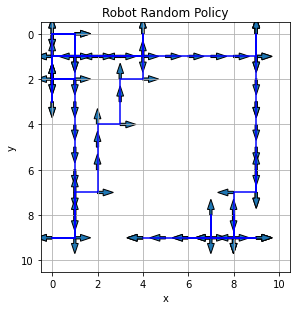

In [321]:
class RobotHMM:
    def __init__(self, robot_env, direction):
        self.env=robot_env
        self.state_history = []
        self.action_histor = []
        self.direction = direction
        
    def reset(self, init_state):
        terminal = False
        self.state_history.append(init_state)
        return self.take_action(init_state, terminal)    
    
    def take_action(self, state, terminal):
        direction = 2
        robot_matrix = np.array([[0.7, 0,3]])
        self.state_history.append(state)
        if not terminal:
            if np.random.random() < 0.7:
                if self.direction > -1:
                    return self.direction
                else:
                    return np.random.randint(4) 
            else:
                return np.random.randint(4)
        else:
            self.direction = np.random.randint(4)
            return np.random.randint(4)
        
    def render(self, title):
        self._plot_history(title)
    
    def _plot_history(self, title):
        
        fig = plt.figure()
        plt.imshow(self.env.grid_map.T, cmap='gray_r')
        plt.grid()
        fig.tight_layout()
        
        
        x = np.zeros(len(self.state_history))
        y = np.zeros(x.shape)
        for idx in range(len(x)):
            x[idx] = self.state_history[idx][0]
            y[idx] = self.state_history[idx][1]
            if self.state_history[idx][2] == 0:
                plt.arrow(x[idx], y[idx], 0., -0.25, width=0.1)
            elif self.state_history[idx][2] == 1:
                plt.arrow(x[idx], y[idx], 0.25, 0., width=0.1)
            elif self.state_history[idx][2] == 2:
                plt.arrow(x[idx], y[idx], 0., 0.25, width=0.1)
            else:
                plt.arrow(x[idx], y[idx], -0.25, 0., width=0.1)

        plt.plot(x, y, 'b-')  # Plot trajectory
        plt.xlim([-0.5, self.env.width + 0.5])
        plt.ylim([self.env.height + 0.5, -0.5])
        plt.title(title)
        plt.xlabel('x')
        plt.ylabel('y')
    
        
        plt.show()
        return fig
    
init_state = (0,0,2)    
robot_grid = RobotEnv(10,10,init_state)
hmm_robot = RobotHMM(robot_grid, -1)
action = hmm_robot.reset(init_state)

for r in range(100):
    next_state, terminal = robot_grid.step(action)
    action = hmm_robot.take_action(next_state, terminal)
robot_grid.render('Robot Random Policy')


2. Describe using text and markdown how this problem can be formulated as an HMM **(basic - 2 points)**. 

The transition model would be the robots movment probablities (0.7, 0.3) with all adjacent grid points so the transition matrix would be the size of the grid^2, and the emissions (observation) would be the probablity of what the senor will output [0.1, 0.4, 0.4, 0.1]

$P(X_{t+1}= j|X_t =i) = T_{ij} \big\{1/N(i) if j ∈ NEIGHBORS(i)$

3. Use the HMM and sampling to generate both the true movement of the robot as well as locations provided by the observation sensor. Draw the true path as well as the sensor path with different colors on a rectangular grid **(expected - 2 points)** 

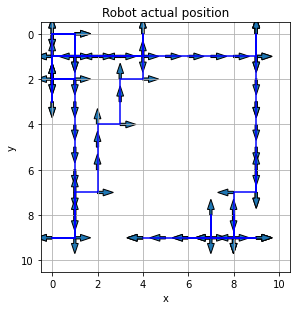

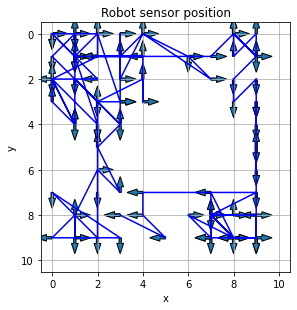

In [322]:
robot_grid.render('Robot actual position')
hmm_robot.render("Robot sensor position")

4. Use just the generated observed samples (not the hidden states) to estimate the parameters of the HMM i.e the transition and observations matrices **(expected - 2 points)** 

In [323]:
hmm_robot.state_history

[(0, 0, 2),
 (0, 0, 2),
 (1, 0, 2),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 3),
 (2, 0, 0),
 (1, 1, 0),
 (1, 0, 1),
 (0, 1, 2),
 (3, 4, 2),
 (1, 2, 2),
 (2, 3, 2),
 (2, 4, 2),
 (2, 7, 2),
 (2, 9, 2),
 (0, 7, 2),
 (3, 9, 2),
 (1, 9, 2),
 (0, 9, 3),
 (1, 8, 1),
 (1, 9, 1),
 (1, 8, 0),
 (2, 6, 1),
 (3, 7, 0),
 (2, 5, 0),
 (3, 4, 0),
 (3, 3, 1),
 (2, 3, 0),
 (4, 2, 0),
 (4, 3, 1),
 (4, 1, 0),
 (3, 1, 0),
 (4, 0, 0),
 (6, 1, 2),
 (2, 1, 3),
 (4, 1, 3),
 (2, 1, 3),
 (0, 2, 3),
 (2, 4, 2),
 (1, 1, 2),
 (0, 0, 1),
 (2, 2, 3),
 (0, 2, 2),
 (1, 4, 0),
 (1, 4, 2),
 (0, 3, 0),
 (0, 2, 0),
 (1, 4, 0),
 (1, 0, 0),
 (2, 0, 1),
 (3, 3, 1),
 (3, 0, 1),
 (3, 2, 1),
 (4, 0, 1),
 (7, 2, 1),
 (6, 1, 1),
 (7, 1, 1),
 (8, 0, 1),
 (9, 1, 1),
 (8, 0, 0),
 (9, 1, 0),
 (8, 0, 0),
 (8, 1, 0),
 (9, 0, 0),
 (9, 1, 2),
 (8, 2, 2),
 (8, 3, 2),
 (9, 2, 2),
 (9, 4, 2),
 (9, 3, 2),
 (9, 3, 2),
 (9, 5, 2),
 (9, 6, 2),
 (9, 5, 0),
 (9, 9, 2),
 (9, 8, 3),
 (9, 9, 2),
 (7, 9, 2),
 (7, 8, 0),
 (8, 8, 0),
 (7, 8, 2),
 (8, 9, 2),
 (7,

# Mini-Project 4 
## Map coloring and constraint satisfaction solvers 

This project is based on material from Chapter 6 Constraint Satisfaction Problems. You will need to review that material on your own.

The code below implements a simple basic backtracking CSP solver. Make sure you understand the code before answering the questions. You can create small examples and add print statements to better understand how it works. 


1. Use this code to solve the Australia map coloring problem described in the book. **(Basic - 2 points)** 

In [408]:
def isComplete(assignment):
    return None not in (assignment.values())

def select_unassigned_variable(variables, assignment):
    for var in variables:
        if assignment[var] is None:
            return var

def is_consistent(assignment, constraints):
    for constraint_violated in constraints:
        if constraint_violated(assignment):
          return False
    return True

def init_assignment(csp):
    assignment = {}
    for var in csp["VARIABLES"]:
        assignment[var] = None
    return assignment

def add_constraint(csp, constraint): 
    csp['CONSTRAINTS'].append(constraint)
    
def recursive_backtracking(assignment, csp):
    if isComplete(assignment):
        return assignment
    var = select_unassigned_variable(csp["VARIABLES"], assignment)
    for value in csp["DOMAINS"]:
        assignment[var] = value
        if is_consistent(assignment, csp["CONSTRAINTS"]):
            result = recursive_backtracking(assignment, csp)
            if result != "FAILURE":
                return result
        assignment[var] = None
    return "FAILURE"

def binary_constraint(var_pair, violations):
    (v1,v2) = var_pair
    return lambda asmt: (asmt[v1], asmt[v2]) in violations

{'WA': 'red', 'SA': 'green', 'V': 'red', 'NSW': 'blue', 'Q': 'red', 'NT': 'blue', 'T': 'red'}


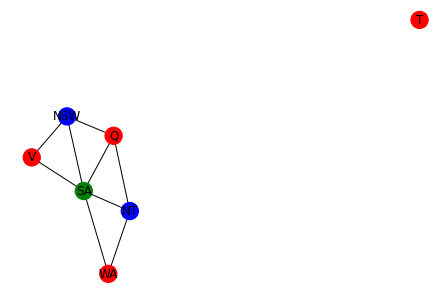

In [409]:
australia_csp = {}
australia_csp["VARIABLES"] = ["WA", "SA", "V", "NSW", "Q", "NT", "T"]
australia_csp["DOMAINS"] = ["red", "green", "blue"]
australia_csp["CONSTRAINTS"] = []
violations = [("red", "red"), ("green", "green"), ("blue", "blue")]
add_constraint(australia_csp, binary_constraint(("SA", "WA"), violations))
add_constraint(australia_csp, binary_constraint(("SA", "NT"), violations))
add_constraint(australia_csp, binary_constraint(("SA", "Q"), violations))
add_constraint(australia_csp, binary_constraint(("SA", "NSW"), violations))
add_constraint(australia_csp, binary_constraint(("SA", "V"), violations))
add_constraint(australia_csp, binary_constraint(("WA", "NT"), violations))
add_constraint(australia_csp, binary_constraint(("NT", "Q"), violations))
add_constraint(australia_csp, binary_constraint(("Q", "NSW"), violations))
add_constraint(australia_csp, binary_constraint(("NSW", "V"), violations))

unassigned = init_assignment(australia_csp)

assigned = recursive_backtracking(unassigned, australia_csp)
color_map = []
aus = nx.Graph()
for key in assigned:
    aus.add_node(key)
    color_map.append(assigned[key])

aus.add_edges_from([('WA', 'NT'), ('WA', 'SA'), ('SA', 'NT'), ('SA', 'Q'), ('SA', 'NSW'), ('SA', 'V'), ('V', 'NSW'),
                   ('NSW', 'Q'), ('NT', 'Q')])
    
nx.draw(aus, node_color=color_map,with_labels=True)
print(assigned)


2. Suppose that we want to enforce that Westeran Australia (WA) should be blue in our solution. Create an initial assignment to pass as the first argument to recursive backtracking to achieve that. **(Basic - 2 points)** 

{'WA': 'blue', 'SA': 'green', 'V': 'red', 'NSW': 'blue', 'Q': 'red', 'NT': 'blue', 'T': 'red'}


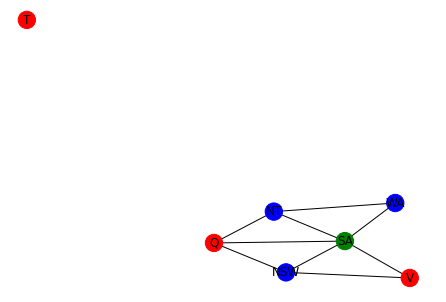

In [410]:
#unassigned2 = unassigned
unassigned2['WA'] = 'blue'
assigned2 = recursive_backtracking(unassigned2, australia_csp)
color_map2 = []
aus2 = nx.Graph()
for key in assigned2:
    aus2.add_node(key)
    color_map2.append(assigned2[key])

aus2.add_edges_from([('WA', 'NT'), ('WA', 'SA'), ('SA', 'NT'), ('SA', 'Q'), ('SA', 'NSW'), ('SA', 'V'), ('V', 'NSW'),
                   ('NSW', 'Q'), ('NT', 'Q')])
    
nx.draw(aus2, node_color=color_map2,with_labels=True)
print(assigned2)

3. Add a unary constraint function. Similarly to binary constraint it should return a function that takes as input an assignment and return true if the assignment violates the constraint. Show how this new unary constraint can be used to enforce that WA is blue and T is blue in the resulting solution. **(Expected - 2 points)** 

{'WA': 'blue', 'SA': 'red', 'V': 'blue', 'NSW': 'green', 'Q': 'blue', 'NT': 'green', 'T': 'blue'}


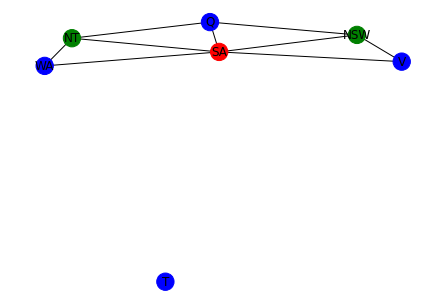

In [411]:
def unary_constraint(var, color):
    return lambda asmt: asmt[var] != color

add_constraint(australia_csp, unary_constraint("WA", "blue"))
add_constraint(australia_csp, unary_constraint("T", "blue"))

unassigned3 = init_assignment(australia_csp)
unassigned3["T"] = "blue"
assigned3 = recursive_backtracking(unassigned3, australia_csp)
color_map3 = []
aus3 = nx.Graph()

if assigned3 != "FAILURE":
    for key in assigned3:
        aus3.add_node(key)
        color_map3.append(assigned3[key])

aus3.add_edges_from([('WA', 'NT'), ('WA', 'SA'), ('SA', 'NT'), ('SA', 'Q'), ('SA', 'NSW'), ('SA', 'V'), ('V', 'NSW'),
                   ('NSW', 'Q'), ('NT', 'Q')])
    
nx.draw(aus3, node_color=color_map3,with_labels=True)
print(assigned3)

4. Generate random instances of map-coloring problems as follows: scatter n points on the unit square; select a point X at random, connect X by a straight line to the nearest point Y such that X is not already connected to Y and the line crosses no other line; repeat the previous step until no more connections are possible. The points represent regions on the map and the lines connect neighbors. Make a visualization of the resulting coloring **(Expected - 2 points)** 

add edge 6 0
add edge 8 0
add edge 4 0
add edge 9 0
add edge 7 0
add edge 2 0
add edge 5 0
add edge 1 0
add edge 3 0
add edge 5 1
add edge 3 1
add edge 6 2
add edge 4 2
add edge 7 2
add edge 3 2
add edge 6 3
add edge 7 4
add edge 8 5
add edge 9 7


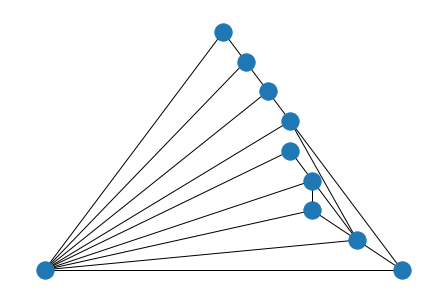

In [569]:
import math
def distance(p1, p2):
    return math.sqrt((p2[0]-p1[0])**2 + (p2[1] - p1[1])**2)

def intersect(p1, p2, p3, p4):
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = p3
    x4,y4 = p4
    denom = (y4-y3)*(x2-x1) - (x4-x3)*(y2-y1)
    if denom == 0: # parallel
        return None
    ua = ((x4-x3)*(y1-y3) - (y4-y3)*(x1-x3)) / denom
    if ua < 0 or ua > 1: # out of range
        return None
    ub = ((x2-x1)*(y1-y3) - (y2-y1)*(x1-x3)) / denom
    if ub < 0 or ub > 1: # out of range
        return None
    x = x1 + ua * (x2-x1)
    y = y1 + ua * (y2-y1)
    return (int(x),int(y))

def intersect_free(p1, p2, edges):
    if not edges:
        return True
    
    for e in edges:
        templist = [p1, p2, nodes[e[0]], nodes[e[1]]]
        if intersect(p1, p2, nodes[e[0]], nodes[e[1]]) != None and intersect(p1, p2, nodes[e[0]], nodes[e[1]]) not in templist:
            return False
    return True

def create_planar(n, nodes, edges):
    for i in range(n):
        nodes.append((random.randint(0,20), random.randint(0,20)))
    
    graph = np.zeros(shape=(n,n))
    for n in range(len(nodes)):
        for n2 in range(len(nodes)):
            graph[n, n2] = distance(nodes[n], nodes[n2])
    
    for d in range(len(graph)):
        i = len(graph[d])
        min_val = 0.1
        while(i != 0):
            b = np.ma.MaskedArray(graph[d], graph[d]<=min_val)
            a = np.argmin(b)
            if (a, d) not in edges and intersect_free(nodes[a], nodes[d], edges) and (d, a) not in edges and a != d:
                edges.append((a,d))
                print("add edge", a, d)
            min_val = graph[d][a]
            i = i-1
            
    return nodes, edges
        
    
nodes = []
edges = []
gen_size = 10
nodes, edges = create_planar(gen_size, nodes, edges)
rand_gen = nx.Graph()

csp = {}
csp["VARIABLES"] = []
csp["DOMAINS"] = ["red", "green", "blue"]
csp["CONSTRAINTS"] = []
violations = [("red", "red"), ("green", "green"), ("blue", "blue")]
for n in range(len(nodes)):
    csp["VARIABLES"].append(n)
    
for e in edges:
    add_constraint(csp, binary_constraint(e, violations))

for i in range(gen_size):
    rand_gen.add_node(i)

unassigned_csp = init_assignment(csp)
assigned_csp = recursive_backtracking(unassigned_csp, csp)
color_map_csp = []
if assigned_csp != "FAILURE":
    for key in assigned_csp:
        color_map_csp.append(assigned_csp[key])
    
rand_gen.add_edges_from(edges)
nx.draw_planar(rand_gen)

5. Add the min-conflicts heuristic and construct a table of average run times for each algorithm (basic backtracking, backtracking with min-conflicts) for increasing values of n. Stop when n makes the problem too slow to compute. **(Advanced - 2 points) ** 